# KNN Classification for Banknote Authentication Data

### **Sitao Min**

## 1. Banknote authentication Dataset

Data were extracted from images that were taken from genuine and forged banknote- like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### (a) Download the Skin Segmentation data from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.

### (b) Pre-Processing and Exploratory data analysis:

#### import data and basic data information

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('data_banknote_authentication.txt',sep = ',', names = ['variance','skewness','curtosis','entropy','class'])

In [19]:
df.shape

(1372, 5)

In [20]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


In [22]:
df.index

RangeIndex(start=0, stop=1372, step=1)

In [23]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [24]:
df.values

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [26]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#### (i) Make Scatterplot for each of independent variables

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

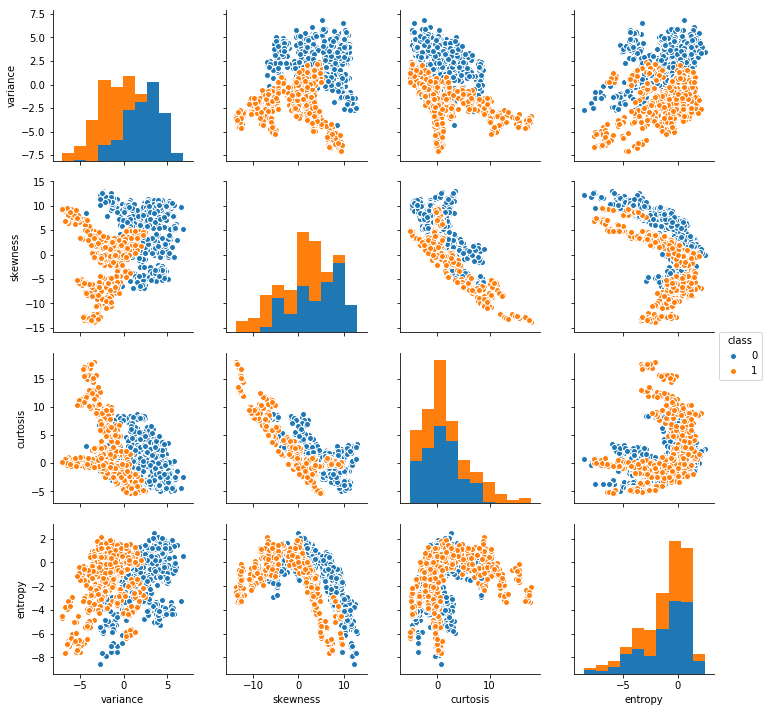

In [48]:
g = sns.pairplot(df,hue='class',vars = ['variance','skewness','curtosis','entropy'])
plt.show()

#### (ii) Make boxplots for each of the independent variables.

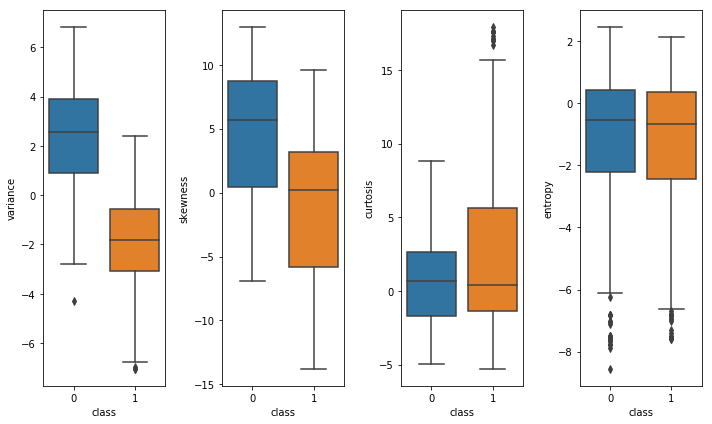

In [71]:
fig, axes = plt.subplots(1,4,figsize=(10,6))
for index in range(len(df.columns)-1):
    axes[index] = sns.boxplot(x = df['class'], y = df.iloc[:,index], orient= 'v',ax = axes[index])

plt.tight_layout()
plt.show() 

#### (iii) Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [6]:
df_class0 = df[df['class'] == 0]
df_class1 = df[df['class'] == 1]

In [7]:
print(df_class0.shape, df_class1.shape)

(762, 5) (610, 5)


In [8]:
Test_set = pd.concat([df_class0.iloc[0:200,:],df_class1.iloc[0:200,:]])
Train_set = pd.concat([df_class0.iloc[200:,:], df_class1.iloc[200: ,:]])

In [9]:
print(Train_set.shape,Test_set.shape)

(972, 5) (400, 5)


### (c) Classification using KNN on Banknote authentication Dataset

#### (i). train KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train = Train_set.iloc[:,0:4].values
y_train = Train_set.iloc[:,4].values
X_test = Test_set.iloc[:,0:4].values
y_test = Test_set.iloc[:,4].values

In [11]:
def kNN_train(X_train, y_train, X_test, y_test, k_set, weight = 'uniform', metric = 'minkowski'):
    print("===============================================")

    train_error = np.empty(len(k_set))
    test_error = np.empty(len(k_set))

    for index,k in enumerate(k_set):

        knn = KNeighborsClassifier(n_neighbors=k, weights = weight, metric = metric)
        # fitting the model
        knn.fit(X_train, y_train)
        # predict the response
        y_train_pred = knn.predict(X_train)
        y_pred = knn.predict(X_test)
        # evaluate accuracy
        train_error[index] = 1- metrics.accuracy_score(y_train,y_train_pred)
        test_error[index] = 1- metrics.accuracy_score(y_test,y_pred) 
        
    print('Using %s distance metrics:'%(metric))
    print('optimal k: %f' % k_set[test_error.argmin()])
    print('best train error: %f'% train_error.min())
    print('best test error: %f'% test_error.min())
    return train_error,test_error

#### (ii). Test result

In [12]:
k_set = np.arange(1,901,1)
train_error,test_error = kNN_train(X_train, y_train, X_test,y_test,k_set)

Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000


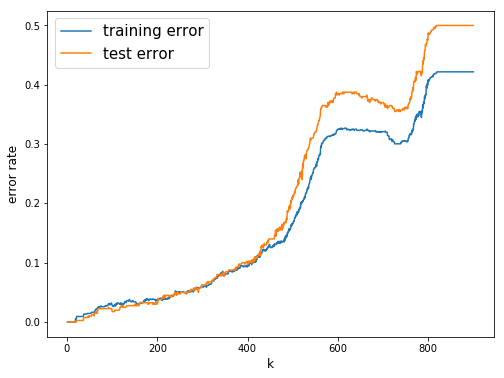

In [13]:
plt.figure(figsize=(8,6))
plt.plot(k_set,train_error,label = 'training error')
plt.plot(k_set,test_error, label = 'test error')
plt.xlabel('k',fontsize = 12)
plt.ylabel('error rate', fontsize = 12)
plt.legend(fontsize=15)
plt.show()

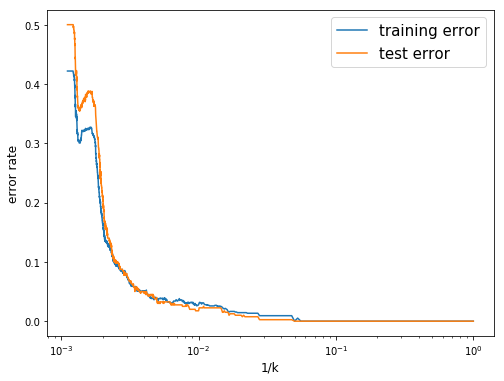

In [14]:
k_inverse = 1/k_set
plt.figure(figsize=(8,6))
plt.semilogx(k_inverse, train_error, label = 'training error')
plt.semilogx(k_inverse, test_error, label = 'test error')
plt.xlabel('1/k', fontsize = 12)
plt.ylabel('error rate', fontsize = 12)
plt.legend(fontsize=15)
plt.show()

 According to above result, I think k = 1 is most suitable for all k. So we choose k* = 1

In [15]:
k_star = 1
knn = KNeighborsClassifier(n_neighbors= k_star)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

# classification report
print('classification report:')
print(metrics.classification_report(y_test,y_pred))

# confusion matrix 
print('confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400

confusion matrix:
[[200   0]
 [  0 200]]


#### (iii) Since the computation time depends on the size of the training set, one may only use a subset of the training set.

In [20]:
N_set = np.arange(50,901,50)
best_error_rate = np.empty(len(N_set))


for i, N in enumerate(N_set):
    
    if N/2 <= Train_set[Train_set['class']==1].shape[0]:
        X_train = pd.concat([Train_set[Train_set['class']==0].iloc[0:int(N/2),0:4],
                         Train_set[Train_set['class']==1].iloc[0:int(N/2),0:4]]).values
        y_train = pd.concat([Train_set[Train_set['class']==0].iloc[0:int(N/2),4],
                         Train_set[Train_set['class']==1].iloc[0:int(N/2),4]]).values
    else:
        class1_len = Train_set[Train_set['class']==1].shape[0]
        X_train = pd.concat([Train_set[Train_set['class']==0].iloc[0:N-class1_len,0:4],
                         Train_set[Train_set['class']==1].iloc[0:,0:4]]).values
        y_train = pd.concat([Train_set[Train_set['class']==0].iloc[0:N-class1_len,4],
                         Train_set[Train_set['class']==1].iloc[0:,4]]).values
    
    
    X_test = Test_set.iloc[:,0:4].values
    y_test = Test_set.iloc[:,4].values
    
    
    k_set = np.arange(1,X_train.shape[0]+1,40)
    
    _, test_error = kNN_train(X_train, y_train, X_test,y_test,k_set)
    best_error_rate[i] = test_error.min()
    print('N : %d'%N)

Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.032500
N : 50
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.037500
N : 100
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.012500
N : 150
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
N : 200
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
N : 250
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
N : 300
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
N : 350
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
N : 400
Using minkowski distance metrics:
optimal k: 1.000000
best train error: 0.000000


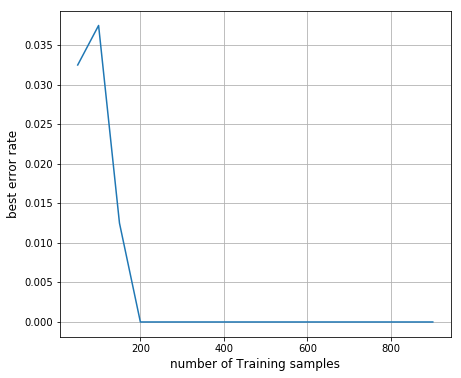

In [21]:
plt.figure(figsize=(7,6))
plt.plot(N_set,best_error_rate)
plt.grid(True)
plt.xlabel('number of Training samples', fontsize = 12)
plt.ylabel('best error rate', fontsize = 12)
plt.show()

### (d) Replace the Euclidean metric with other metics

In [22]:
X_train = Train_set.iloc[:,0:4].values
y_train = Train_set.iloc[:,4].values
X_test = Test_set.iloc[:,0:4].values
y_test = Test_set.iloc[:,4].values

#### i. Minkowski Distance:

**A. which becomes Manhattan Distance with p = 1.**

In [23]:
k_set = np.arange(1,901,10)
_,_ = kNN_train(X_train, y_train, X_test,y_test,k_set, metric = 'manhattan')

Using manhattan distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000


**B. with log10(p) ∈ {0.1,0.2,0.3,...,1}.**

In [24]:
n_set = np.arange(0.1,1.1,0.1)
train_error = np.empty(len(n_set))
test_error = np.empty(len(n_set))

for index,n in enumerate(n_set):
    knn = KNeighborsClassifier(n_neighbors= 1,p = pow(10,n),metric= 'minkowski')
    # fitting the model
    knn.fit(X_train, y_train)
    # predict the response
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    train_error[index] = 1- metrics.accuracy_score(y_train,y_train_pred)
    test_error[index] = 1- metrics.accuracy_score(y_test,y_pred)

In [25]:
print('Using log10(p) distance metrics (optimal k=12):')
print('optimal log10(p): %f' % n_set[test_error.argmin()])
print('best test error: %f'% test_error.min())

Using log10(p) distance metrics (optimal k=12):
optimal log10(p): 0.100000
best test error: 0.000000


**C. which becomes Chebyshev Distance with p → ∞**

In [27]:
k_set = np.arange(1,901,10)
_,_ = kNN_train(X_train, y_train, X_test,y_test,k_set,metric ='chebyshev')

Using chebyshev distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000


#### ii. Mahalanobis Distance.

In [33]:
X_train = Train_set.iloc[:,0:4].values
y_train = Train_set.iloc[:,4].values
X_test = Test_set.iloc[:,0:4].values
y_test = Test_set.iloc[:,4].values

k_set = np.arange(1,901,1)
train_error = np.empty(len(k_set))
test_error = np.empty(len(k_set))

for index,k in enumerate(k_set):
    knn = KNeighborsClassifier(n_neighbors=k, metric= 'mahalanobis',metric_params = {'V': np.cov(X_train,rowvar = False)})
    # fitting the model
    knn.fit(X_train, y_train)
    # predict the response
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    train_error[index] = 1- metrics.accuracy_score(y_train,y_train_pred)
    test_error[index] = 1- metrics.accuracy_score(y_test,y_pred)

In [34]:
print('Using Mahalanobis distance metrics:')
print('optimal k: %f' % k_set[test_error.argmin()])
print('best test error: %f'% test_error.min())

Using Mahalanobis distance metrics:
optimal k: 1.000000
best test error: 0.000000


### (e) Use weighted voting with Euclidean, Manhattan, and Chebyshev distances

In [35]:
X_train = Train_set.iloc[:,0:4].values
y_train = Train_set.iloc[:,4].values
X_test = Test_set.iloc[:,0:4].values
y_test = Test_set.iloc[:,4].values

In [36]:
k_set = np.arange(1,901,10)
kNN_train(X_train, y_train, X_test,y_test,k_set,metric ='euclidean',weight = 'distance')
kNN_train(X_train, y_train, X_test,y_test,k_set,metric ='manhattan',weight = 'distance')
kNN_train(X_train, y_train, X_test,y_test,k_set,metric ='chebyshev',weight = 'distance')

Using euclidean distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
Using manhattan distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000
Using chebyshev distance metrics:
optimal k: 1.000000
best train error: 0.000000
best test error: 0.000000


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.    , 0.    , 0.    , 0.    , 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 , 0.005 ,
        0.005 , 0.005 , 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
        0.0025, 0.0025, 0.0025, 0.0025, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.0025, 0.0025, 0.0025, 0.005 , 0.005 , 0.005 , 0.005 ,
        0.005 , 0.005 , 0.005 , 0.0075, 0.0075, 0.0075, 0.0075, 0.01  ,
        0.01  

### lowest training error rate

Lowest training error rate is 0.0